In [9]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train original shape: {x_train.shape}")
print(f"y_train original shape: {y_train.shape}")

x_train original shape: (60000, 28, 28)
y_train original shape: (60000,)


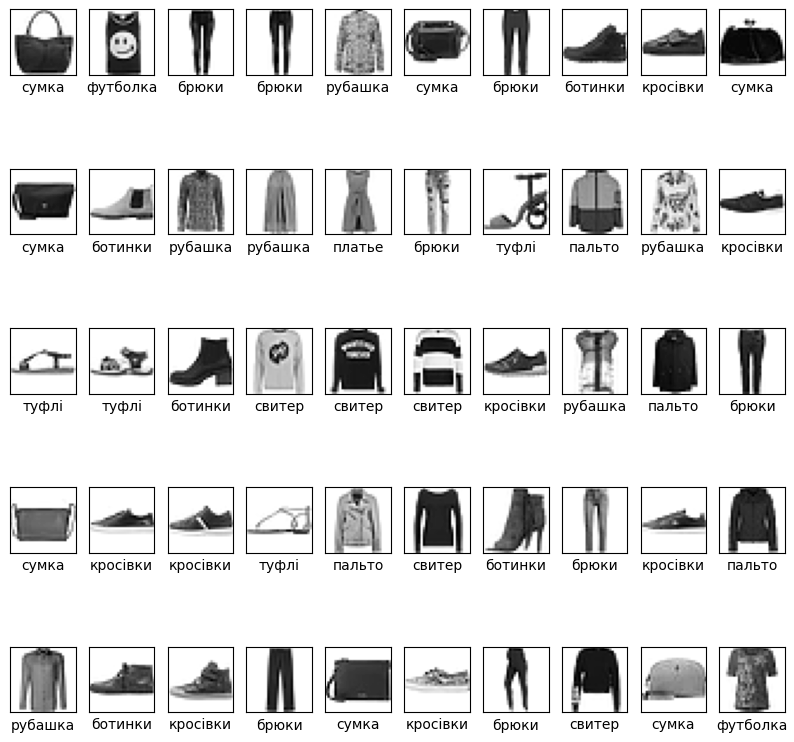

In [11]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфлі', 'рубашка', 'кросівки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [12]:
# Перетворення розмірності зображень
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# Нормалізація даних
x_train = x_train / 255 
x_test = x_test / 255 

# Перетворюємо мітки в категорії
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [13]:
# Створюємо послідовну модель
model = Sequential()
# Додаємо рівні мережі
# Вхідний повнозв'язаний шар, 800 нейронів, 784 входа в кожний нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Вихідний повнозв'язаний шар, 10 нейронів 
model.add(Dense(10, activation="softmax"))

c:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Компілюємо модель
model.compile(loss="categorical_crossentropy", 
              optimizer="SGD", 
              metrics=["accuracy"])

# архітектура мережі
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, 
                    batch_size=450, 
                    epochs=50,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4569 - loss: 1.8243 - val_accuracy: 0.6947 - val_loss: 1.1039
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7017 - loss: 1.0371 - val_accuracy: 0.7363 - val_loss: 0.8752
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7421 - loss: 0.8516 - val_accuracy: 0.7590 - val_loss: 0.7779
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7589 - loss: 0.7699 - val_accuracy: 0.7725 - val_loss: 0.7218
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7779 - loss: 0.7160 - val_accuracy: 0.7823 - val_loss: 0.6794
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7859 - loss: 0.6777 - val_accuracy: 0.7918 - val_loss: 0.6493
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 0.6523 - val_accuracy: 0.7994 - val_loss: 0.6269
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.6239 - val_accuracy: 0.

In [16]:
# зберігаємо модель
model.save('fashion_mnist_dense.h5')

In [17]:
# оцінка якості навчання
scores = model.evaluate(x_test, y_test, verbose=1)
print(f"Доля верных ответов на тестовых данных, в процентах: {round(scores[1] * 100, 2)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.8467 - loss: 0.4522
Доля верных ответов на тестовых данных, в процентах: 84.08


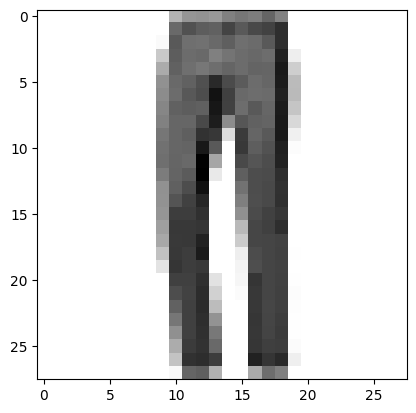

In [18]:
# розпізнаємо одяг
n_rec = 496
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [19]:
# змінимо розмір, нормалізуємо
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

# розпізнаємо
prediction = model.predict(x)

prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Номер класса: 1
Название класса: брюки
